In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import glob
import time

# flx - plot

In [2]:
month = '06' # Options 06, 12
yaxis='lev' # Options: lev, z
path_in = './processed_data/flux/monthly/'
flux_nonrr = xr.open_mfdataset(path_in + f'on_{yaxis}_nonrr_flx_monthly_mean*2010-{month}*')
flux_rr = xr.open_mfdataset(path_in + f'on_{yaxis}_rr_flx_monthly_mean*{month}*')

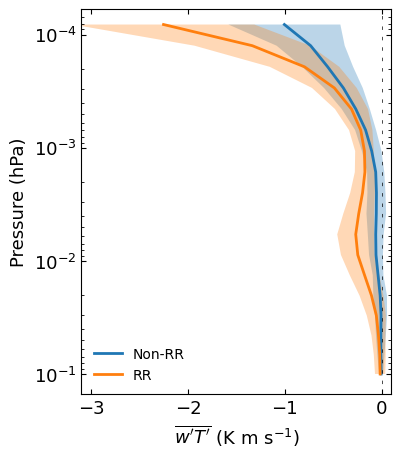

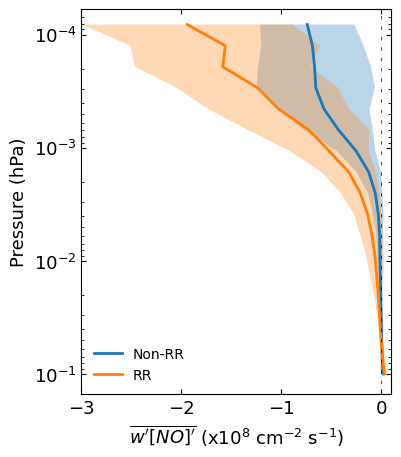

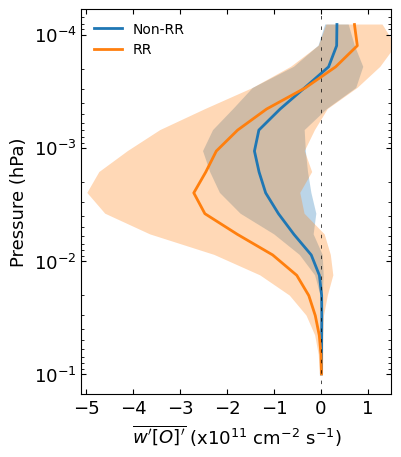

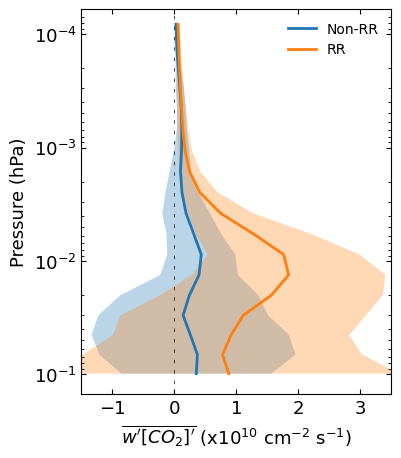

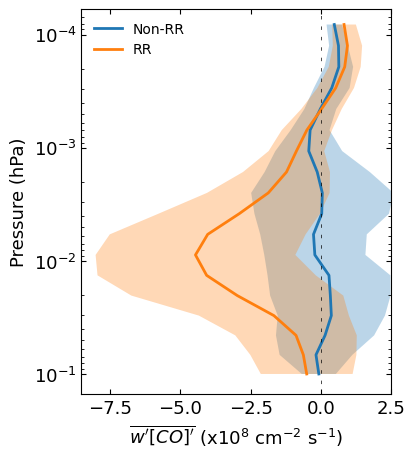

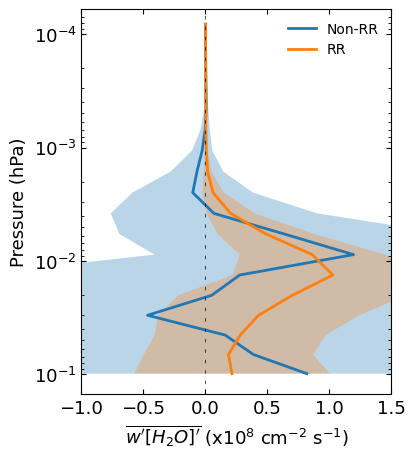

In [4]:
# Plot Non-RR and RR fluxes, use flux_rr.keys() to get var names (same for both models)
for var in ['T_flux','NO_n_flux','O_n_flux','CO2_n_flux','CO_n_flux','H2O_n_flux']:

    
    # ----------------------------------
    # Control plot
    user_settings=True
    user_ticks = True
    savefig=True
    # axes limits
    if yaxis=='lev':
        yL = 1.5e-1
        yU = 6e-5
        ylabel='Pressure (hPa)'
    if yaxis=='z':
        yL=62
        yU=113
        ylabel='z (km)'    
    # tick and label sizes
    label_size=13
    # plot line width
    line_width=2
    # plot size
    figx, figy = 4,5 
    # labels
    
    # Set x limits and labels based on variable
    if var=='T_flux':
        xlabel='$\overline{w\'T\'}$ (K m s$^{-1}$)'
        if month == '06':
            xL = -3.1
            xU = 0.1
        if month=='12':
            xL = -3.1
            xU = 0.1
        factor=1
    if var == 'NO_n_flux':
        xlabel='$\overline{w\'[NO]\'}$ (x10$^{8}$ cm$^{-2}$ s$^{-1}$)'
        if month == '06':
            xL = -3
            xU = 0.1
        if month=='12':
            xL = -6.5
            xU = 2
        factor=1e-8
    if var == 'O_n_flux':
        xlabel='$\overline{w\'[O]\'}$ (x10$^{11}$ cm$^{-2}$ s$^{-1}$)'
        if month == '06':
            xL = -5.1
            xU = 1.5
            xticks=[-5,-4,-3,-2,-1,0,1]
        if month=='12':
            xL = -9
            xU = 1.5
        factor=1e-11
    if var == 'CO2_n_flux':
        xlabel='$\overline{w\'[CO_2]\'}$ (x10$^{10}$ cm$^{-2}$ s$^{-1}$)'
        if month == '06':
            xL = -1.5
            xU = 3.5
        if month=='12':
            xL = -1.5
            xU = 3.5
        factor = 1e-10
    if var == 'CO_n_flux':
        xlabel='$\overline{w\'[CO]\'}$ (x10$^8$ cm$^{-2}$ s$^{-1}$)'
        if month == '06':
            xL = -8.5
            xU = 2.5
        if month=='12':
            xL = -10
            xU = 10
        factor=1e-8
    if var == 'H2O_n_flux':
        xlabel='$\overline{w\'[H_2O]\'}$ (x10$^8$ cm$^{-2}$ s$^{-1}$)'
        if month == '06':
            xL = -1
            xU = 1.5
        if month=='12':
            xL = -3
            xU = 3
        factor=1e-8

    # ----------------------------------
    
    plt.subplots(figsize=(figx,figy))

    if user_settings:
        if yaxis =='lev':
            flux_nonrr_plot = factor*flux_nonrr[var]
            flux_rr_plot = factor*flux_rr[var]
            
            # Plot fluxes
            flux_nonrr_plot.plot(y='lev',yscale='log',ylim=[yL,yU],xlim=[xL,xU],linewidth=line_width, label='Non-RR')
            flux_rr_plot.plot(y='lev',yscale='log',ylim=[yL,yU],xlim=[xL,xU],linewidth=line_width, label='RR')

            ax = plt.gca()
            
            # Plot errors
            std_nonrr = factor*flux_nonrr[f'{var}_std']
            z = flux_nonrr.lev
            ax.fill_betweenx(z,flux_nonrr_plot-2*std_nonrr, flux_nonrr_plot+2*std_nonrr, alpha=0.3)
            
            std_rr = factor*flux_rr[f'{var}_std']
            ax.fill_betweenx(z,flux_rr_plot-2*std_rr, flux_rr_plot+2*std_rr, alpha=0.3)
            
            plt.xlabel(xlabel,size=label_size)
            plt.ylabel(ylabel,size=label_size)
            plt.tick_params(labelsize=label_size,which="both",direction="in",top=True,right=True)

            plt.legend(frameon=False)
            ax.set_title('')
            plt.axvline(0,linestyle=(0,(5,10)),color='k',linewidth=0.5)
            
            if user_ticks:
                if var == 'O_n_flux':
                    ax.set_xticks(xticks)
            
            if savefig: plt.savefig(f'./media/on_{yaxis}_{var}_2010-{month}.png',bbox_inches='tight',dpi=200)
        if yaxis=='z':
            flux_nonrr_plot = factor*flux_nonrr[var]
            flux_rr_plot = factor*flux_rr[var]
            
            # Plot fluxes
            flux_nonrr_plot.plot(y='z',ylim=[yL,yU],xlim=[xL,xU],linewidth=line_width, label='Non-RR')
            flux_rr_plot.plot(y='z',ylim=[yL,yU],xlim=[xL,xU],linewidth=line_width, label='RR')

            ax = plt.gca()
            
            # Non-RR std
            z_nonrr = flux_nonrr.z
            std_nonrr = factor*flux_nonrr[f'{var}_std']
            ax.fill_betweenx(z_nonrr,flux_nonrr_plot-2*std_nonrr, flux_nonrr_plot+2*std_nonrr, alpha=0.2)
            
            # RR std
            z_rr = flux_rr.z
            std_rr = factor*flux_rr[f'{var}_std']
            ax.fill_betweenx(z_rr,flux_rr_plot-2*std_rr, flux_rr_plot+2*std_rr, alpha=0.2)
            
            plt.xlabel(xlabel,size=label_size)
            plt.ylabel(ylabel,size=label_size)
            plt.tick_params(labelsize=label_size,which="both",direction="in",top=True,right=True)
            
            if user_ticks:
                if var == 'O_n_flux':
                    ax.set_xticks(xticks)

            plt.legend(frameon=False)
            ax.set_title('')
            plt.axvline(0,linestyle=(0,(5,10)),color='k',linewidth=0.5)
            if savefig: plt.savefig(f'./media/on_{yaxis}_{var}_2010-{month}.png',bbox_inches='tight',dpi=200)
    else:
        if yaxis =='lev':
            (flux_nonrr[var]).plot(y='lev',yscale='log',ylim=[1e0,1e-5])
            (flux_rr[var]).plot(y='lev',yscale='log',ylim=[1e0,1e-5])   


In [4]:
for var in ['T_flux','NO_n_flux','O_n_flux','CO2_n_flux','CO_n_flux','H2O_n_flux']:
    print('flux_nonrr',var,flux_nonrr[var].values)
    print('\nflux_rr',var,flux_rr[var].values)

flux_nonrr T_flux [-1.47872744 -1.0971258  -0.77163351 -0.57480141 -0.40799879 -0.25777535
 -0.16919076 -0.11785571 -0.09138875 -0.09074911 -0.08805039 -0.08356406
 -0.06729009 -0.04099203 -0.03303328 -0.02673379 -0.01705515 -0.01132472]

flux_rr T_flux [-3.03495736 -1.72551524 -0.9945284  -0.60955692 -0.40578152 -0.27142163
 -0.21227836 -0.19227371 -0.21217203 -0.23578838 -0.23465721 -0.20302979
 -0.14963679 -0.10260542 -0.06674556 -0.04095096 -0.03037344 -0.02230356]
flux_nonrr NO_n_flux [-4.25444855e+07 -9.16546984e+07 -1.14232607e+08 -1.07497960e+08
 -8.57565672e+07 -6.07618931e+07 -4.18696669e+07 -2.73281324e+07
 -1.61799122e+07 -7.38671131e+06  1.14143704e+05  2.49291015e+06
  1.04782533e+06  8.12504819e+04 -5.36091329e+04  1.10721997e+06
  3.43148042e+06  4.66405232e+06]

flux_rr NO_n_flux [-1.08254534e+08 -2.16579481e+08 -2.43350441e+08 -2.27778434e+08
 -1.66170878e+08 -1.27233342e+08 -9.15233822e+07 -7.20585924e+07
 -5.84615746e+07 -4.47823337e+07 -2.81812554e+07 -1.55677325e+

In [33]:
tend_list = []
z_list = []
for i in range(len(flux_rr.z.values)-1):
    dflux = flux_rr.isel(z=i) - flux_rr.isel(z=i+1)
    dz = flux_rr.z.isel(z=i) - flux_rr.z.isel(z=i+1)
    tend = dflux/dz
    tend_list.append(tend)
    z_list.append((flux_rr.z.isel(z=i).values + flux_rr.z.isel(z=i+1).values)*0.5)

# tend_nonrr_crude 
# tend_rr_crude

In [30]:
z_list

[109.22774942910263,
 106.28271692540878,
 103.57092836409986,
 100.95999760655394,
 98.37199053690848,
 95.77040050600687,
 93.14827867777959,
 90.51878511511515,
 87.90556888100038,
 85.33150612795143,
 82.80463376377307,
 80.30969316934494,
 77.81595475644693,
 75.29384212501782,
 72.72573420479846,
 70.10791556722208,
 67.44754526953548]

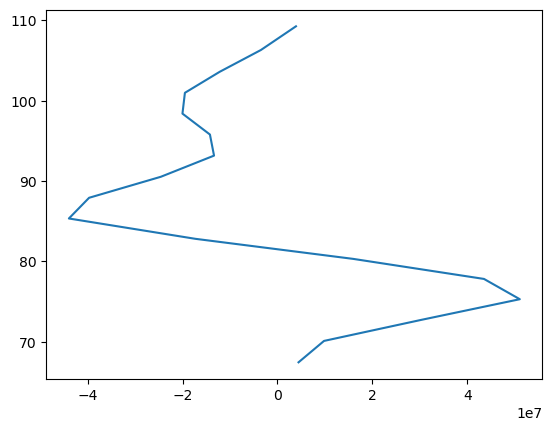

In [34]:
x = xr.concat(tend_list,dim='z')['CO_n_flux'][:]
y = z_list[:]
plt.plot(x,y)

# w trans - plot

In [7]:
# Read in data
month = '06' # Options : 06, 12
yaxis = 'lev' # Options: lev, z (approximate geometric altitude)
wtrans_type = 'mean_of_daily_means' # Options : mean_of_daily_means, from_monthly_mean_flux

In [8]:
if wtrans_type == 'from_monthly_mean_flux': # i.e. mm_flux/mm_q

    path_in1 = './processed_data/flux/monthly/'
    flux_nonrr = xr.open_mfdataset(path_in1 + f'on_{yaxis}_nonrr_flx_monthly_mean_2010-{month}.nc')
    flux_rr = xr.open_mfdataset(path_in1 + f'on_{yaxis}_rr_flx_monthly_mean_2010-{month}.nc')

    path_in2 = './processed_data/time_domain_means/monthly/'
    mean_nonrr = xr.open_mfdataset(path_in2 + f'on_{yaxis}_nonrr_monthly_mean_2010-{month}.nc')
    mean_rr = xr.open_mfdataset(path_in2 + f'on_{yaxis}_rr_monthly_mean_2010-{month}.nc')
   
    # Calculate wtrans from monthly mean fluxes and q
    wtrans_nonrr = xr.Dataset()
    wtrans_rr = xr.Dataset()
    for var in ['T','O_n','NO_n','CO2_n','CO_n','H2O_n']:
        # Calculate transport velocities
        wtrans_nonrr[f'{var}_wtrans'] = flux_nonrr[f'{var}_flux']/mean_nonrr[var]
        wtrans_rr[f'{var}_wtrans'] = flux_rr[f'{var}_flux']/mean_rr[var]
        
if wtrans_type == 'mean_of_daily_means': # i.e. 1/NDAYS SUM_OVER_NDAYS(wtrans_daily_mean)
    path_in = './processed_data/wtrans/monthly/'
    wtrans_nonrr = xr.open_mfdataset(path_in + f'on_{yaxis}_nonrr_wtrans_2010-{month}.nc')
    wtrans_rr = xr.open_mfdataset(path_in + f'on_{yaxis}_rr_wtrans_2010-{month}.nc')

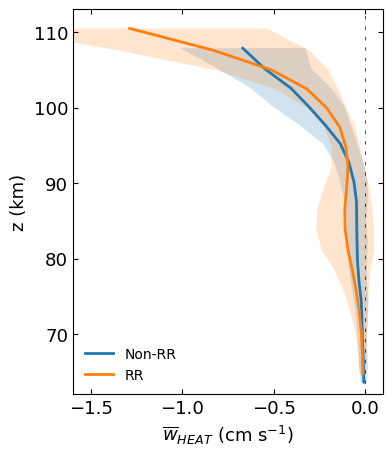

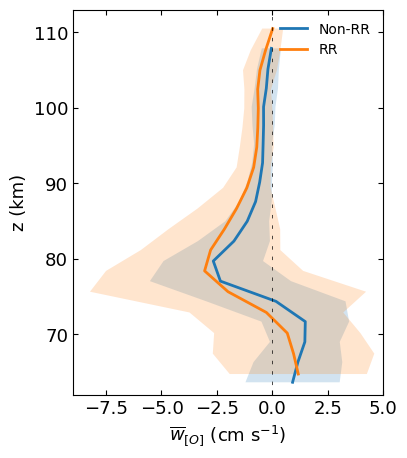

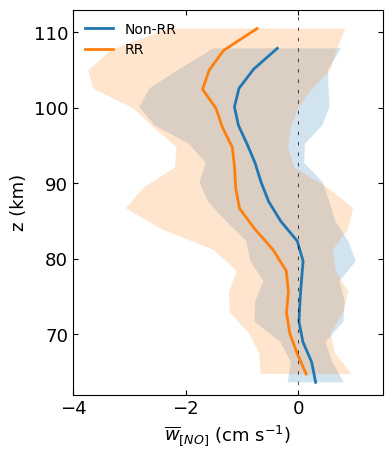

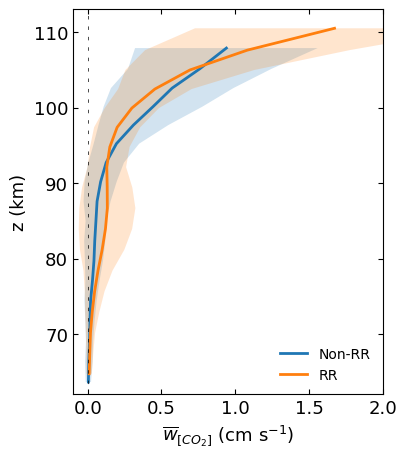

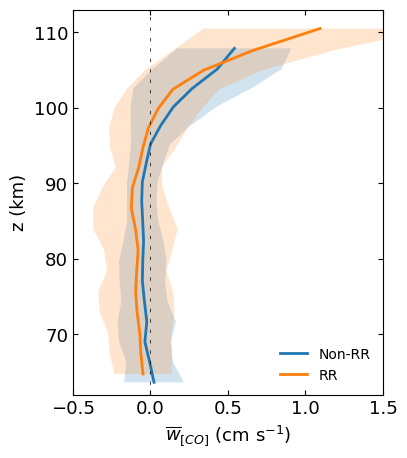

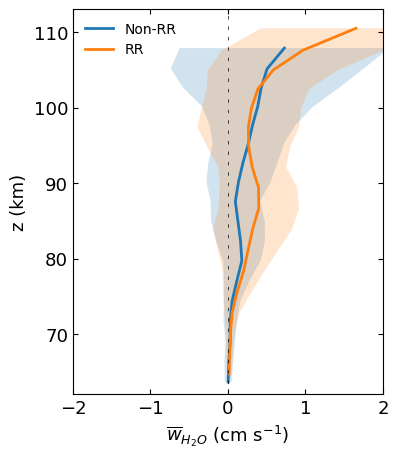

In [12]:
# Plot Non-RR and RR transport velocities on lev

for var in ['T','O_n','NO_n','CO2_n','CO_n','H2O_n']:

    # ----------------------------------
    # Control plot
    user_settings=True
    # axes limits
    if yaxis == 'lev':
        yL = 1.5e-1
        yU = 6e-5
        ylabel='Pressure (hPa)'
    if yaxis == 'z':
        yL=62
        yU=113
        ylabel='z (km)'   
    # tick and label sizes
    label_size=13
    # plot line width
    line_width=2
    # plot size
    figx, figy = 4,5
    
    # Set x limits and labels based on variable
    if var=='T':
        xlabel='$\overline{w}_{HEAT}$ (cm s$^{-1}$)'
        if month == '06':
            xL = -1.5
            xU = 0.1
        if month == '12':
            xL = -1.6
            xU = 0.1
        factor=1
    if var == 'O_n':
        xlabel='$\overline{w}_{[O]}$ (cm s$^{-1}$)'
        if month == '06':
            xL = -7.5
            xU = 2.5
        if month == '12':
            xL = -9
            xU = 5
        factor=1
    if var == 'NO_n':
        xlabel='$\overline{w}_{[NO]}$ (cm s$^{-1}$)'
        if month == '06':
            xL = -2.55
            xU = 0.5
        if month == '12':
            xL = -4
            xU = 1.5
        factor=1
    if var == 'CO2_n':
        xlabel='$\overline{w}_{[CO_2]}$ (cm s$^{-1}$)'
        if month == '06':
            xL = -0.1
            xU = 1.6
        if month == '12':
            xL = -0.1
            xU = 2
        factor = 1
    if var == 'CO_n':
        xlabel='$\overline{w}_{[CO]}$ (cm s$^{-1}$)'
        if month == '06':
            xL = -1
            xU = 1.25
        if month == '12':
            xL = -0.5
            xU = 1.5
        factor=1
    if var == 'H2O_n':
        xlabel='$\overline{w}_{H_2O}$ (cm s$^{-1}$)'
        if month == '06':
            xL = -1
            xU = 1.25
        if month == '12':
            xL = -2
            xU = 2
        factor=1

    # ----------------------------------
    
    plt.subplots(figsize=(figx,figy))

    if user_settings:
       
        if yaxis == 'lev':
            wtrans_nonrr_plot = factor*wtrans_nonrr[f'{var}_wtrans']
            wtrans_rr_plot = factor*wtrans_rr[f'{var}_wtrans']
            
            # Plot wtrans
            wtrans_nonrr_plot.plot(y='lev',yscale='log',ylim=[yL,yU],xlim=[xL,xU],linewidth=line_width, label='Non-RR')
            wtrans_rr_plot.plot(y='lev',yscale='log',ylim=[yL,yU],xlim=[xL,xU],linewidth=line_width, label='RR')

            ax = plt.gca()
            
            # Get wtrans std
            std_nonrr = factor*wtrans_nonrr[f'{var}_wtrans_std']
            std_rr = factor*wtrans_rr[f'{var}_wtrans_std']
            
            # Plot Non-RR std
            lev = wtrans_nonrr.lev.values
            ax.fill_betweenx(lev,wtrans_nonrr_plot-2*std_nonrr,wtrans_nonrr_plot+2*std_nonrr,alpha=0.2)
            
            # Plot RR std
            ax.fill_betweenx(lev,wtrans_rr_plot-2*std_rr,wtrans_rr_plot+2*std_rr,alpha=0.2)
            

            plt.xlabel(xlabel,size=label_size)
            plt.ylabel(ylabel,size=label_size)
            plt.tick_params(labelsize=label_size,which="both",direction="in",top=True,right=True)
            plt.legend(frameon=False)
            
            plt.axvline(0,linestyle=(0,(5,10)),color='k',linewidth=0.5)
            
            if savefig: plt.savefig(f'./media/on_lev_{var}_wtrans_2010-{month}.png',dpi=200)

        if yaxis == 'z':
            wtrans_nonrr_plot = factor*wtrans_nonrr[f'{var}_wtrans']
            wtrans_rr_plot = factor*wtrans_rr[f'{var}_wtrans']
            
            # Plot wtrans
            wtrans_nonrr_plot.plot(y='z',ylim=[yL,yU],xlim=[xL,xU],linewidth=line_width, label='Non-RR')
            wtrans_rr_plot.plot(y='z',ylim=[yL,yU],xlim=[xL,xU],linewidth=line_width, label='RR')

            ax = plt.gca()
            
            # Get wtrans std
            std_nonrr = factor*wtrans_nonrr[f'{var}_wtrans_std']
            std_rr = factor*wtrans_rr[f'{var}_wtrans_std']
            
            # Plot Non-RR std
            z_nonrr = wtrans_nonrr.z
            ax.fill_betweenx(z_nonrr,wtrans_nonrr_plot-2*std_nonrr,wtrans_nonrr_plot+2*std_nonrr,alpha=0.2)
            
            # Plot RR std
            z_rr = wtrans_rr.z
            ax.fill_betweenx(z_rr,wtrans_rr_plot-2*std_rr,wtrans_rr_plot+2*std_rr,alpha=0.2)
            
            if var == 'O_n':
                ax.set_xticks([-7.5,-5,-2.5,0,2.5,5])
            

            plt.xlabel(xlabel,size=label_size)
            plt.ylabel(ylabel,size=label_size)
            plt.tick_params(labelsize=label_size,which="both",direction="in",top=True,right=True)
            plt.legend(frameon=False)
            
            plt.axvline(0,linestyle=(0,(5,10)),color='k',linewidth=0.5)
            plt.title('')
            
            if savefig: plt.savefig(f'./media/on_z_{var}_wtrans_2010-{month}.png',dpi=200)
        
    
    else:
        (wtrans_nonrr).plot(y='lev',yscale='log',ylim=[1e0,1e-5])
        (wtrans_rr).plot(y='lev',yscale='log',ylim=[1e0,1e-5])   
        
